In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

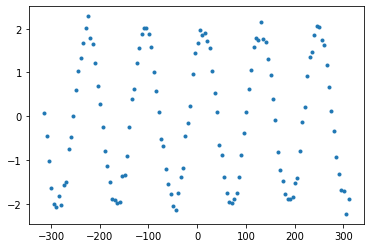

In [17]:
df = pd.read_csv('datos.csv')
X = df['x'].values
Y = df['y'].values
plt.figure()
plt.plot(X, Y, '.')
plt.show()

$r(x) = A \sin(Bx + c\pi)$

$P = [A, B, C]$

17.72828070664622


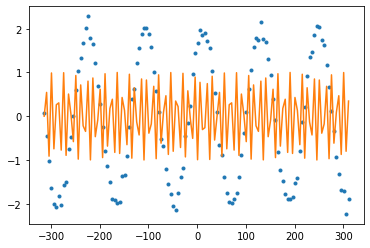

In [18]:
def objective_function(P2 : np.array, X, Y):
    r"""Expects solutions of shape (num_solutions, 3). Returns an array, the objective function of each element.
    If num_solutions=1, returns a single elemnt"""

    #Transform into matrix
    P = P2.reshape((-1, 3))
    # Compute Sen(B*X + C*pi)
    XMatrix = np.concatenate((X.reshape((-1,1)), np.ones((len(X),1))*np.pi),axis=1)
    not_scaled = np.sin(P[:,1:3]@np.transpose(XMatrix))

    #Compute A* not_scaled
    scaling = P[:,0].reshape(-1,1)@np.ones((1,len(X)))
    Y_Pred = np.multiply(scaling, not_scaled)
    
    #Compute Squared Difference
    nY = np.ones((P.shape[0],1))@Y.reshape((1,-1))
    final = np.linalg.norm(Y_Pred-nY, axis = 1)

    if(final.size == 1):
            return final[0]
    return final


def draw_solution(P, X, Y):
    A, B, C = P
    Yp = A * np.sin(B * X + C * np.pi)
    plt.figure()
    plt.plot(X, Y, '.')
    plt.plot(X, Yp)
    plt.show()

P = np.ones((3))
P[0] = 1
P[1] = 2
P[2] = 3
print(objective_function(P, X, Y))
draw_solution(P, X, Y)
print()

# Scipy Differential Evolution

In [19]:
from scipy.optimize import differential_evolution

In [44]:
bounds = [[-100, 100], # Rango de A
          [-100, 100], # Rango de B
          [0,2]] # Rango de C

In [45]:
res = differential_evolution(objective_function, bounds, args=(X, Y))
res


     fun: 1.176581021084863
     jac: array([2.50244271e-05, 2.39600341e-02, 1.14330768e-04])
 message: 'Optimization terminated successfully.'
    nfev: 10281
     nit: 224
 success: True
       x: array([-1.99827875, -5.07963882,  1.0346966 ])

1.176581021084863


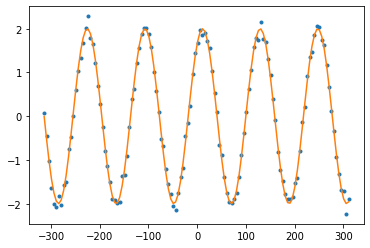

In [46]:
P3 = res.x
print(objective_function(P3, X, Y))
draw_solution(P3, X, Y)

# Evolutionary Programming

In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from evolutionary_programming import evolutionary_programming


In [113]:
ans, progress = evolutionary_programming(objective_function, bounds, args=(X, Y))
ans

Evolutionary Programming


{'x': array([ 1.97895714, 42.77790591,  0.84353088]),
 'nit': 2000,
 'fun': 3.1181921948904785,
 'nfev': 2005,
 'jac': array([ 1.81375083e-01, -1.03609018e+03, -2.47618217e+01])}

Objective_function: 3.1181921948927167


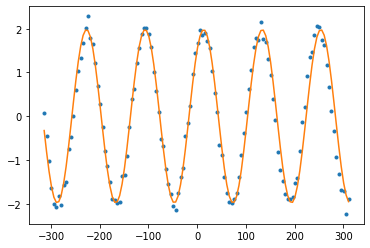

In [114]:
P3 = ans['x']
print("Objective_function:", objective_function(P3, X, Y))
draw_solution(P3, X, Y)


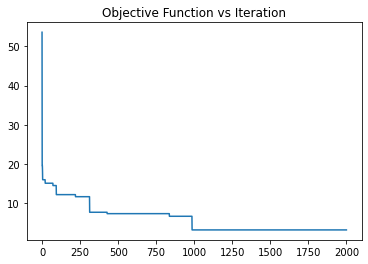

In [115]:
plt.plot(progress)
plt.title('Objective Function vs Iteration')
plt.show()